In [1]:
import os
import cv2
from deepface import DeepFace
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm

### Image DeepFace Analyze

(928, 1500, 3)


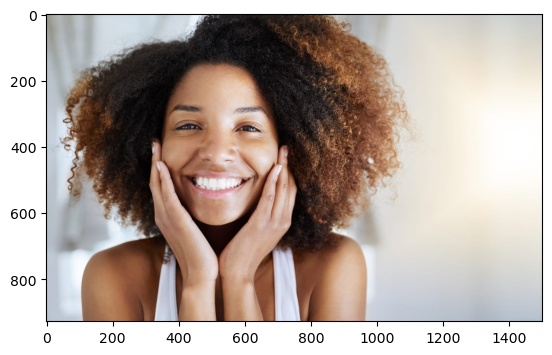

In [2]:
# Read image
data_raw_dir = "/home/tamires/projects/rpp-aevans-ab/tamires/data/movies"
img_path = os.path.join(data_raw_dir, "test.jpg")
image = cv2.imread(img_path)
print(image.shape)

# Display the image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert the image from BGR to RGB
plt.imshow(image_rgb)
plt.show()


In [ ]:
objs = DeepFace.analyze(
            img_path=img_path,
            actions=['age', 'gender', 'race', 'emotion'],
            #xpand_percentage=0.2,
            detector_backend='retinaface',
            #anti_spoofing=True
            #align=False
           )
objs

In [ ]:
# Draw squares and emotions
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert the image from BGR to RGB
for face in range(len(objs)):

    # Draw rectangle around the face
    x, y, w, h = objs[face]['region']['x'], objs[face]['region']['y'], objs[face]['region']['w'], objs[face]['region']['h']
    
    # Annotate emotion
    emotion = objs[face]['dominant_emotion']
    str0="Face Confidence: " + str(objs[face]['face_confidence'])
    str1="Emotion Confidence: " + str(round(objs[face]['emotion'][emotion],0)/100)
    str2="Emotion: " + emotion
    
    # Image
    height, width, _ = image_rgb.shape
    font_size = width * 0.001           
    thickness = int(width * 0.004)        
    letters_distance = int(10*font_size) 
    color = (255, 0, 0)
    image_labeled = cv2.rectangle(image_rgb, (x, y), (x+w, y+h), color, thickness)
    image_labeled = cv2.rectangle(image_rgb, (x, y), (x+w, y+h), color, thickness)
    cv2.putText(image_labeled, str0, (x+w+letters_distance, y+2*letters_distance), cv2.FONT_HERSHEY_SIMPLEX, font_size, color, thickness)
    cv2.putText(image_labeled, str1, (x+w+letters_distance, y+5*letters_distance), cv2.FONT_HERSHEY_SIMPLEX, font_size, color, thickness)
    cv2.putText(image_labeled, str2, (x+w+letters_distance, y+8*letters_distance), cv2.FONT_HERSHEY_SIMPLEX, font_size, color, thickness)

# Display the image
plt.imshow(image_labeled)
plt.show()
print(str0)
print(str1)
print(str2)

In [6]:
# Perform face verification
verification_result = DeepFace.verify(img_path, img_path, model_name="Facenet", distance_metric="cosine")
verification_result

{'verified': True,
 'distance': 3.3306690738754696e-16,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 313,
   'y': 185,
   'w': 415,
   'h': 415,
   'left_eye': (605, 348),
   'right_eye': (432, 343)},
  'img2': {'x': 313,
   'y': 185,
   'w': 415,
   'h': 415,
   'left_eye': (605, 348),
   'right_eye': (432, 343)}},
 'time': 1.38}

### Video DeepFace Analyze

In [26]:
# Paths
data_raw_dir = "/Users/tamirescorreamarcal/Desktop/Projetos/neuromovies/data_raw"
data_processed_dir = "/Users/tamirescorreamarcal/Desktop/Projetos/neuromovies/data_processed"

In [29]:
# Change Frame per Second
name = "barbiesmallest"
#name = "trailer"
fps_ = 10
cap = VideoFileClip(os.path.join(data_raw_dir,f"{name}.mp4"))
cap = cap.set_fps(fps_)
#cap = cap.subclip("00:17:20", "00:19:20")
cap.write_videofile(os.path.join(data_raw_dir,f"{name}{fps_}.mp4"), fps=fps_)

# Check New Movie low Frame
cap = cv2.VideoCapture(os.path.join(data_raw_dir,f"{name}{fps_}.mp4"))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Frames per second and count: {fps} and {frame_count}")
print(f"Width: {width}, Height: {height}")
cap.release()

Moviepy - Building video trailer10.mp4.
MoviePy - Writing audio in trailer10TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video trailer10.mp4



Moviepy - Done !
Moviepy - video ready trailer10.mp4
Frames per second and count: 10.0 and 1540
Width: 640, Height: 360


In [24]:
# Check New Movie low Frame
name = "barbiesmallest10"
#name = "trailer10"
cap = cv2.VideoCapture(os.path.join(data_raw_dir,f"{name}.mp4"))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Frames per second and count: {fps} and {frame_count}")
print(f"Width: {width}, Height: {height}")
cap.release()

Frames per second and count: 10.0 and 1200
Width: 1920, Height: 960


In [ ]:
"""
Iteration over the movie to analyze faces and emotions
1) Safe information in dataframe
2) Show face analizes in each frame
3) Save movie with face analizes
"""


# Initialize video capture and writer
name = "barbiesmallest10"
#name = "trailer10"
cap = cv2.VideoCapture(os.path.join(data_raw_dir,f"{name}.mp4"))
cap_duplicate = cv2.VideoCapture(os.path.join(data_raw_dir,f"{name}.mp4"))

# Define the codec and create VideoWriter object
fps = 10
fourcc = cv2.VideoWriter_fourcc(*'avc1')  # Codec for saving video
out = cv2.VideoWriter(os.path.join(data_processed_dir,f"processed_{name}.mp4"),
                      fourcc,
                      fps, 
                      (int(cap.get(3)), int(cap.get(4))))

# Iterate over the movie
dict_face_times = {}
second = 0
frame_idx = 0
last_frame_had_single_face = False
face_match_prior = False
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

while True:
    ret, frame = cap.read()
    frame_idx = frame_idx + 1
    second = frame_idx/fps # fps = 10

    # Break the loop if we've reached the end of the video
    if not ret:
        break

    try:
        # Try to identify faces and emotions
        objs = DeepFace.analyze(frame, 
                                actions=['emotion'], 
                                #xpand_percentage=0.2,
                                detector_backend='retinaface',
                                #anti_spoofing=True
                                #align=False
                               )
        print(f"Faces detected {frame_idx} frame of {frame_count} ({second} second)")#: {objs}")


        #######################################################################

        if len(objs) == 1:

            # Perform face verification for match prior frame
            if last_frame_had_single_face:
              cap_duplicate.set(cv2.CAP_PROP_POS_FRAMES, frame_idx-1)
              _, prior_frame = cap_duplicate.read()
              face_match_prior = DeepFace.verify(prior_frame, frame, model_name="Facenet", distance_metric="cosine")['verified']
              #print(f"Face match prior face in last frame: {face_match_prior}")

            # Save the emotions times for single faces
            dict_face_times[frame_idx] = {
                'second': second,
                'type': "single face",
                'face_confidence': objs[0]['face_confidence'],
                'emotion': objs[0]['dominant_emotion'],
                'emotion_confidence': round(objs[0]['emotion'][objs[0]['dominant_emotion']],0)/100,
                'face_match_prior': face_match_prior}

            # Save for next frame alanyzes
            last_frame_had_single_face = True

        elif len(objs) > 1:

            # Save the times for multiple faces
            dict_face_times[frame_idx] = {
                'second': second,
                'type': "multiple faces",
                'face_confidence': np.nan,
                'emotion': np.nan,
                'emotion_confidence': np.nan,
                'face_match_prior': np.nan}

            # Save for next frame alanyzes
            last_frame_had_single_face = False

        #######################################################################
        # Draw squares and emotions
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Convert the image from BGR to RGB
        for face in range(len(objs)):

          # Rectangle around the face
          x, y, w, h = objs[face]['region']['x'], objs[face]['region']['y'], objs[face]['region']['w'], objs[face]['region']['h']

          # Annotate emotion
          emotion = objs[face]['dominant_emotion']
          str0="Face Confidence: " + str(objs[face]['face_confidence'])
          str1="Emotion Confidence: " + str(round(objs[face]['emotion'][emotion],0)/100)
          str2="Emotion: " + emotion
          str3="* Single face match prior"

          # Image
          width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
          font_size = width * 0.0007           
          thickness = int(width * 0.003)        
          letters_distance = int(10*font_size) 
          color = (255, 0, 0)
          image_labeled = cv2.rectangle(image_rgb, (x, y), (x+w, y+h), color, thickness)
          cv2.putText(image_labeled, str0, (x+w+letters_distance, y+2*letters_distance), cv2.FONT_HERSHEY_SIMPLEX, font_size, color, thickness)
          cv2.putText(image_labeled, str1, (x+w+letters_distance, y+5*letters_distance), cv2.FONT_HERSHEY_SIMPLEX, font_size, color, thickness)
          cv2.putText(image_labeled, str2, (x+w+letters_distance, y+8*letters_distance), cv2.FONT_HERSHEY_SIMPLEX, font_size, color, thickness)
          #if face_match_prior:
          #  cv2.putText(image_labeled, str3, (x+w+letters_distance, y+11*letters_distance), cv2.FONT_HERSHEY_SIMPLEX, font_size, color, thickness)

        # Display the image
        plt.imshow(image_labeled)
        plt.show()

        # Convert to back to false
        face_match_prior = False
        ########################################################################


    # Save the times for no faces
    except Exception as e:
        # Show image without faces
        print(f"Error processing frame {frame_idx} of {frame_count} ({second} second): {e}")
        image_labeled = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Convert the image from BGR to RGB
        plt.imshow(image_labeled)
        plt.show()
        
        dict_face_times[frame_idx] = {
            'second': second,
            'type': "no faces",
            'face_confidence': np.nan,
            'emotion': np.nan,
            'emotion_confidence': np.nan,
            'face_match_prior': np.nan}

        # Save for next frame alanyzes
        last_frame_had_single_face = False
        

    # Convert colour black
    frame = cv2.cvtColor(image_labeled, cv2.COLOR_RGB2BGR)
    # Write the frame with overlay to create labeled movie
    out.write(frame)

# Save dictonary as dataframe
df_face_times = pd.DataFrame(dict_face_times).T
df_face_times.to_csv(os.path.join(data_processed_dir, f"df_face_times_{name}.csv"))

# Release everything if job is finished
cap.release()
cap_duplicate.release()
out.release()
cv2.destroyAllWindows()
